In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


In [2]:
# configuración
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_colwidth', 128)
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimales

In [3]:
# carga de dataset
demog = pd.read_excel('../data/raw/Demograficos.xlsx')
                        

In [4]:
demog.head()

,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,CIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION
0,2017 - 2,53212132001,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,8,4.40,Masculino,02-04-1996,3.00,CALI,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,13/07/17,76001.00,CALI,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Universitrario
1,2017 - 2,7306132001,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,8,3.30,Femenino,01-08-1990,2.00,GUACARI,VALLE DEL CAUCA,Soltero,3.70,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76111.00,BUGA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,27,Edad entre 26 y 33 años,Fac. Salud,Universitrario
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario
3,2017 - 2,53212162577,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,3,3.40,Masculino,15-07-1997,3.00,CALI,VALLE DEL CAUCA,Soltero,3.60,RETIRO DEFINITIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,04/07/17,76001.00,CALI,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,20,Edad entre 18 y 25 años,Fac. Deporte,Universitrario
4,2017 - 2,53212171151,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,3.60,Masculino,24-03-1999,3.00,CALI,VALLE DEL CAUCA,Soltero,3.40,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,31/07/17,76001.00,CALI,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,18,Edad entre 18 y 25 años,Fac. Deporte,Universitrario


In [5]:
# dimension datasets
print(f'Dimensiones del dataset demog         : {demog.shape[0]} registros, {demog.shape[1]} columnas')

Dimensiones del dataset demog         : 55419 registros, 33 columnas


In [6]:
# Revisón de campos vacíos/nulos
nulos_y_tipos = pd.DataFrame({
    'nulos': demog.isnull().sum(),
    'tipo_dato': demog.dtypes
})
nulos_y_tipos

,nulos,tipo_dato
PERIODO_ACAENICO,0,object
CODIGO,0,object
UNIDAD,0,object
CODIGOPROGRAMA,0,int64
PROGRAMA,0,object
SEMESTRE,0,int64
PROMEDIOSEMESTRE,0,float64
GENERO,0,object
FECHANACIMIENTO,2,object
ESTRATO,18,float64


In [7]:
# carga de dataset
notas = pd.read_excel('../data/raw/HistoricoNotas.xlsx')

In [8]:
notas.head()

,CODIGO,CURSO,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA
0,9010602,E.C I (NEGOCIACIÓN Y MANEJO DE CONFLICTOS),A,SI,2,2018-2,1,NO,NORMAL,90555141017,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
1,90106,ELECTIVA COMPLEMENTARIA I,5.0 - CINCO. CERO,SI,2,2018-2,1,NO,NORMAL,90555141017,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
2,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2019-1,2,NO,NORMAL,90555122002,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
3,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2020-1,2,NO,NORMAL,90555151012,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS
4,9020601,E.C. II (LIDERAZGO Y TOMA DE DECISIONES),A,SI,2,2020-1,2,NO,VALIDACIÓN,90555151024,ADM 20112 PENSUM A,ADMINISTRACION DE EMPRESAS


In [9]:
# dimension datasets
print(f'Dimensiones del dataset notas         : {notas.shape[0]} registros, {notas.shape[1]} columnas')

Dimensiones del dataset notas         : 418031 registros, 12 columnas


In [10]:
# Revisón de campos vacíos/nulos
nulos_y_tipos = pd.DataFrame({
    'nulos': notas.isnull().sum(),
    'tipo_dato': notas.dtypes
})
nulos_y_tipos

,nulos,tipo_dato
CODIGO,0,object
CURSO,0,object
Nota_Definitiva,0,object
Aprobado,0,object
Creditos,0,int64
Periodo,0,object
Semestre,0,int64
Cuenta para Promedio,22,object
TIPO,69,object
CODIGOMATRICULA,0,object


In [11]:
# Estadisticas del dataset
notas.describe(include='all')

,CODIGO,CURSO,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA
count,418031,418031,418031,418031,418031.00,418031,418031.00,418009,417962,418031.00,418031,418031
unique,1098,880,86,2,NaN,95,NaN,2,10,13675.00,44,21
top,21101C,TALLER DE COMUNICACIÓN EN SALUD,4.0 - CUATRO. CERO,SI,NaN,2021-2,NaN,SI,NORMAL,7306151020.00,DEP 2015-2 PENSUM C,FISIOTERAPIA
freq,2836,3408,26288,386607,NaN,28721,NaN,336525,407743,183.00,106468,129808
mean,NaN,NaN,NaN,NaN,2.76,NaN,3.91,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.47,NaN,2.33,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.00,NaN,4.00,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.00,NaN,6.00,NaN,NaN,NaN,NaN,NaN


In [12]:
relacion = pd.merge(demog, notas, left_on='CODIGO', right_on='CODIGOMATRICULA', how='inner')

In [13]:
relacion.shape

(175592, 45)

In [14]:
# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(relacion, columns=['Aprobado'], prefix='aprobado')

df_one_hot.head()


,PERIODO_ACAENICO,CODIGO_x,UNIDAD,CODIGOPROGRAMA,PROGRAMA_x,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,CIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,CODIGO_y,CURSO,Nota_Definitiva,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA_y,aprobado_NO,aprobado_SI
0,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73903A,PRACTICA PROFESIONAL CLINICO ASISTENCIAL IV,4.60,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,False,True
1,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73902A,PROYECCION EMPRESARIAL,4.80,3,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,False,True
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73901A,PROYECTO DE INVESTIGACION,4.50,3,2017-1,9,NO,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,False,True
3,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73900A,PRACTICA PROFESIONAL CLINICO ASISTENCIAL III,4.0 - CUATRO. CERO,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,False,True
4,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73001A,PRACTICA DE PASANTIA,4.60,12,2017-2,10,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,False,True


In [15]:
relacion['Aprobado_numeric'] = relacion['Aprobado'].map({'SI': 1, 'NO': 0})
relacion

,PERIODO_ACAENICO,CODIGO_x,UNIDAD,CODIGOPROGRAMA,PROGRAMA_x,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,CIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,CODIGO_y,CURSO,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA_y,Aprobado_numeric
0,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73903A,PRACTICA PROFESIONAL CLINICO ASISTENCIAL IV,4.60,SI,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,1
1,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73902A,PROYECCION EMPRESARIAL,4.80,SI,3,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,1
2,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73901A,PROYECTO DE INVESTIGACION,4.50,SI,3,2017-1,9,NO,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,1
3,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73900A,PRACTICA PROFESIONAL CLINICO ASISTENCIAL III,4.0 - CUATRO. CERO,SI,5,2017-1,9,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,1
4,2017 - 2,7306131002,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,10,4.50,Femenino,14-08-1994,2.00,PALMIRA,VALLE DEL CAUCA,Soltero,4.00,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,25/07/17,76520.00,PALMIRA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2017-II,23,Edad entre 18 y 25 años,Fac. Salud,Universitrario,73001A,PRACTICA DE PASANTIA,4.60,SI,12,2017-2,10,SI,NORMAL,7306131002,FIS 2012-1 PENSUM 5,FISIOTERAPIA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175587,2024 - 1T,7305241T266,ESCUELA NACIONAL DEL DEPORTE,7305,TECNOLOGIA EN DEPORTE,1,4.10,Masculino,30-07-1997,1.00,DAGUA,VALLE DEL CAUCA,Soltero,4.10,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,11/01/24,76233.00,DAGUA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2024-I,27,Edad entre 26 y 33 años,Fac. Deporte,Tecnológico,7305104,PEDAGOGÍA CIENCIA Y DEPORTE,3.90,SI,4,2024-1T,1,SI,NORMAL,7305241T266,TED PENSUM XIV,TECNOLOGIA EN DEPORTE,1
175588,2024 - 1T,7305241T266,ESCUELA NACIONAL DEL DEPORTE,7305,TECNOLOGIA EN DEPORTE,1,4.10,Masculino,30-07-1997,1.00,DAGUA,VALLE DEL CAUCA,Soltero,4.10,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,11/01/24,76233.00,DAGUA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2024-I,27,Edad entre 26 y 33 años,Fac. Deporte,Tecnológico,7305103,TALLER DE LECTURA Y ESCRITURA,3.90,SI,2,2024-1T,1,SI,NORMAL,730524

In [16]:
tabla_aprobados = pd.crosstab(index=relacion['Aprobado'], columns='Conteo')
tabla_aprobados

col_0,Conteo
Aprobado,
NO,13275
SI,162317


In [17]:
no_aprobado = relacion[relacion['Aprobado_numeric']==0]

In [18]:
no_aprobado

,PERIODO_ACAENICO,CODIGO_x,UNIDAD,CODIGOPROGRAMA,PROGRAMA_x,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,CIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,DEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,CODIGO_y,CURSO,Nota_Definitiva,Aprobado,Creditos,Periodo,Semestre,Cuenta para Promedio,TIPO,CODIGOMATRICULA,PENSUM,PROGRAMA_y,Aprobado_numeric
13,2017 - 2G,7305162G195,CERES SALTO AFRO GUACHENE CAUCA,7305,TECNOLOGIA EN DEPORTE,3,3.40,Masculino,12-10-1996,1.00,GUACHENE,CAUCA,Soltero,3.60,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,13/10/17,19300.00,GUACHENE,19.00,CAUCA,0.00,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,733020203,PERFECCIONAMIENTO DEPORTIVO I FUTBOL,3.50,NO,2,2017-2G,3,NO,NORMAL,7305162G195,TED PENSUM XIII,TECNOLOGIA EN DEPORTE,0
15,2017 - 2G,7305162G195,CERES SALTO AFRO GUACHENE CAUCA,7305,TECNOLOGIA EN DEPORTE,3,3.40,Masculino,12-10-1996,1.00,GUACHENE,CAUCA,Soltero,3.60,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,13/10/17,19300.00,GUACHENE,19.00,CAUCA,0.00,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,7330202,ELECTIVA PERFECCIONAMIENTO DEPORTIVO I,3.50,NO,2,2017-2G,3,SI,NORMAL,7305162G195,TED PENSUM XIII,TECNOLOGIA EN DEPORTE,0
19,2017 - 2G,7305162G195,CERES SALTO AFRO GUACHENE CAUCA,7305,TECNOLOGIA EN DEPORTE,3,3.40,Masculino,12-10-1996,1.00,GUACHENE,CAUCA,Soltero,3.60,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,13/10/17,19300.00,GUACHENE,19.00,CAUCA,0.00,NaN,1,2017-II,21,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,7340205,PROYECTO DE INNOVACIÓN TECNOLÓGICA I,2.10,NO,2,2018-1G,4,SI,NORMAL,7305162G195,TED PENSUM XIII,TECNOLOGIA EN DEPORTE,0
46,2017 - 1G,7305162G195,CERES SALTO AFRO GUACHENE CAUCA,7305,TECNOLOGIA EN DEPORTE,2,3.50,Masculino,12-10-1996,1.00,GUACHENE,CAUCA,Soltero,3.70,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,10/03/17,19300.00,GUACHENE,19.00,CAUCA,0.00,NaN,1,2017-I,21,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,733020203,PERFECCIONAMIENTO DEPORTIVO I FUTBOL,3.50,NO,2,2017-2G,3,NO,NORMAL,7305162G195,TED PENSUM XIII,TECNOLOGIA EN DEPORTE,0
48,2017 - 1G,7305162G195,CERES SALTO AFRO GUACHENE CAUCA,7305,TECNOLOGIA EN DEPORTE,2,3.50,Masculino,12-10-1996,1.00,GUACHENE,CAUCA,Soltero,3.70,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,10/03/17,19300.00,GUACHENE,19.00,CAUCA,0.00,NaN,1,2017-I,21,Edad entre 18 y 25 años,Fac. Deporte,Tecnológico,7330202,ELECTIVA PERFECCIONAMIENTO DEPORTIVO I,3.50,NO,2,2017-2G,3,SI,NORMAL,7305162G195,TED PENSUM XIII,TECNOLOGIA EN DEPORTE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175421,2024 - 1T,110571241T125,ESCUELA NACIONAL DEL DEPORTE,110571,TECNOLOGÍA EN GESTIÓN DEPORTIVA,1,3.20,Masculino,27-08-2004,2.00,JAMUNDI,VALLE DEL CAUCA,Soltero,3.20,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,26/01/24,76364.00,JAMUNDI,76.00,VALLE DEL CAUCA,0.00,NaN,1,2024-I,20,Edad entre 18 y 25 años,Fac. Admon,Tecnológico,11100,INGLÉS I,2.60,NO,2,2024-1T,1,SI,NORMAL,110571241T125,TEGD PENSUM A 2022-1,TECNOLOGÍA EN GESTIÓN DEPORTIVA,0
175453,2024 - 1T,110571241T137,ESCUELA NACIONAL DEL DEPORTE,110571,TECNOLOGÍA EN GESTIÓN DEPORTIVA,2,3.70,Femenino,04-01-1996,2.00,GUACARI,VALLE DEL CAUCA,Soltero,3.70,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,09/02/24,76111.00,BUGA,76.00,VALLE DEL CAUCA,0.00,NaN,1,2024-I,28,Edad entre 26 y 33 años,Fac. Admon,Tecnológico,11202,ÉTICA E

In [19]:
tabla_genero = pd.crosstab(index=relacion['GENERO'], columns='Conteo')
tabla_genero

col_0,Conteo
GENERO,
Femenino,39308
Masculino,136284


In [20]:
# Crear la tabla de resumen
tabla_resumen = relacion.groupby(['PERIODO_ACAENICO', 'GENERO', 'SEMESTRE', 'PROGRAMA_x'])['Aprobado_numeric'].agg(['sum', 'count']).reset_index()

# Renombrar las columnas
tabla_resumen.rename(columns={'sum': 'Aprobados', 'count': 'Total'}, inplace=True)

# Calcular la cantidad de no aprobados
tabla_resumen['No_Aprobados'] = tabla_resumen['Total'] - tabla_resumen['Aprobados']

# Mostrar la tabla final
tabla_resumen


,PERIODO_ACAENICO,GENERO,SEMESTRE,PROGRAMA_x,Aprobados,Total,No_Aprobados
0,2017 - 1G,Femenino,2,TECNOLOGIA EN DEPORTE,75,75,0
1,2017 - 1G,Masculino,2,TECNOLOGIA EN DEPORTE,841,906,65
2,2017 - 1P,Femenino,2,ESPECIALIZACION EN DIRECCION Y GESTION DEPORTIVA,232,233,1
3,2017 - 1P,Femenino,2,ESPECIALIZACION EN TEORIA Y METODOLOGIA DEL ENTRENAMIENTO DEPORTIVO,48,49,1
4,2017 - 1P,Femenino,2,ESPECIALIZACIÓN EN ACTIVIDAD FÍSICA,63,63,0
...,...,...,...,...,...,...,...
483,2024 - 1T,Masculino,4,TECNOLOGIA EN DEPORTE,362,407,45
484,2024 - 1T,Masculino,4,TECNOLOGÍA EN GESTIÓN DEPORTIVA,250,257,7
485,2024 - 1T,Masculino,5,TECNOLOGIA EN DEPORTE,1314,1407,93
486,2024 - 1T,Masculino,5,TECNOLOGÍA EN GESTIÓN DEPORTIVA,619,622,3


In [21]:
## programa de mayor NO aprobados
tabla_resumen[tabla_resumen['No_Aprobados']>0].sort_values(by=['No_Aprobados'], ascending=[False])

,PERIODO_ACAENICO,GENERO,SEMESTRE,PROGRAMA_x,Aprobados,Total,No_Aprobados
120,2019 - 1T,Masculino,2,TECNOLOGIA EN DEPORTE,1349,1591,242
156,2019 - 2T,Masculino,3,TECNOLOGIA EN DEPORTE,1263,1505,242
93,2018 - 2T,Masculino,1,TECNOLOGIA EN DEPORTE,1148,1381,233
67,2018 - 1T,Masculino,2,TECNOLOGIA EN DEPORTE,1298,1522,224
215,2020 - 2T,Masculino,3,TECNOLOGIA EN DEPORTE,879,1087,208
...,...,...,...,...,...,...,...
456,2024 - 1P,Femenino,2,ESPECIALIZACIÓN EN FISIOTERAPIA DEL DEPORTE,161,162,1
172,2020 - 1P,Masculino,2,ESPECIALIZACION EN DIRECCION Y GESTION DEPORTIVA,722,723,1
52,2018 - 1P,Femenino,2,ESPECIALIZACION EN DIRECCION Y GESTION DEPORTIVA,345,346,1
5,2017 - 1P,Masculino,1,ESPECIALIZACION EN TEORIA Y METODOLOGIA DEL ENTRENAMIENTO DEPORTIVO,1,2,1


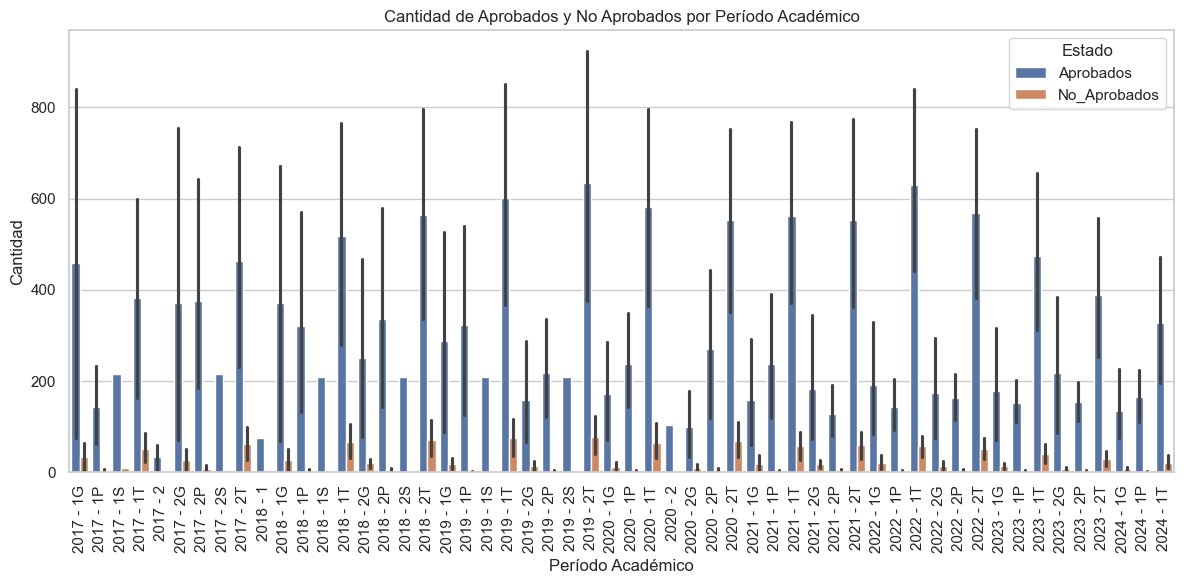

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear un DataFrame largo para facilitar la gráfica
df_melted = tabla_resumen.melt(id_vars=['PERIODO_ACAENICO', 'GENERO', 'SEMESTRE', 'PROGRAMA_x'],
                                 value_vars=['Aprobados', 'No_Aprobados'],
                                 var_name='Estado', value_name='Cantidad')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='PERIODO_ACAENICO', y='Cantidad', hue='Estado')

# Configurar el título y las etiquetas
plt.title('Cantidad de Aprobados y No Aprobados por Período Académico')
plt.xlabel('Período Académico')
plt.ylabel('Cantidad')
plt.legend(title='Estado')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


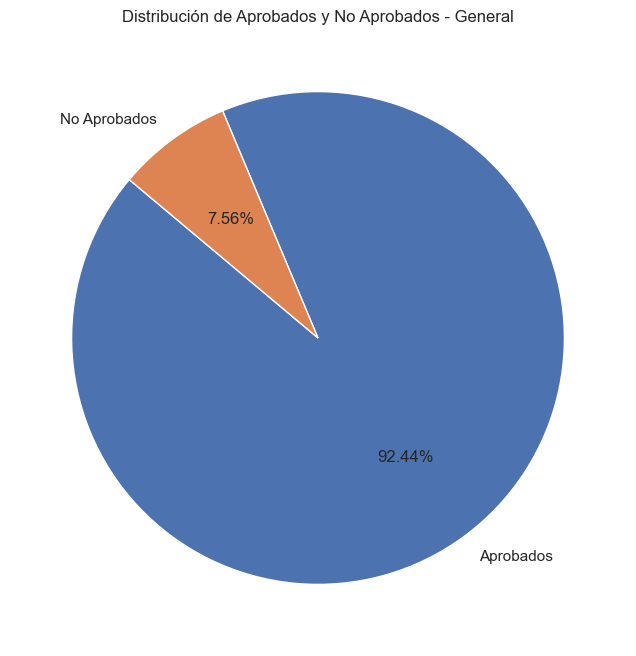

In [23]:
# Gráfico de torta General

datos_periodo = tabla_resumen

# Verificar si el DataFrame tiene datos
#print(datos_periodo)

if not datos_periodo.empty:
    # Sumar Aprobados y No Aprobados
    total_aprobados = datos_periodo['Aprobados'].sum()
    total_no_aprobados = datos_periodo['No_Aprobados'].sum()

    # Crear gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie([total_aprobados, total_no_aprobados],
            labels=['Aprobados', 'No Aprobados'], autopct='%1.2f%%', startangle=140)

    # Configurar título
    plt.title(f'Distribución de Aprobados y No Aprobados - General')
    plt.show()
else:
    print(f"No hay datos para el período: {periodo_especifico}")

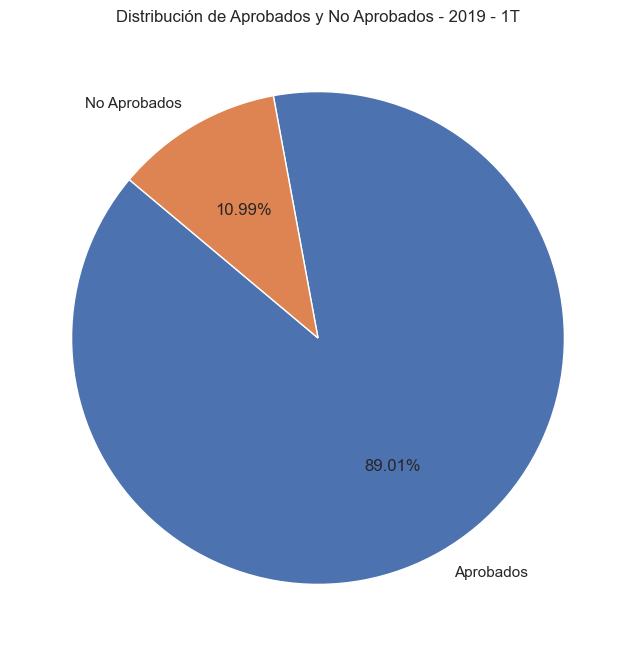

In [24]:
# Gráfico de torta para un período específico
periodo_especifico = '2019 - 1T'
datos_periodo = tabla_resumen[tabla_resumen['PERIODO_ACAENICO'] == periodo_especifico]

# Verificar si el DataFrame tiene datos
#print(datos_periodo)

if not datos_periodo.empty:
    # Sumar Aprobados y No Aprobados
    total_aprobados = datos_periodo['Aprobados'].sum()
    total_no_aprobados = datos_periodo['No_Aprobados'].sum()

    # Crear gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie([total_aprobados, total_no_aprobados],
            labels=['Aprobados', 'No Aprobados'], autopct='%1.2f%%', startangle=140)

    # Configurar título
    plt.title(f'Distribución de Aprobados y No Aprobados - {periodo_especifico}')
    plt.show()
else:
    print(f"No hay datos para el período: {periodo_especifico}")


In [25]:
datos_periodo

,PERIODO_ACAENICO,GENERO,SEMESTRE,PROGRAMA_x,Aprobados,Total,No_Aprobados
113,2019 - 1T,Femenino,1,TECNOLOGIA EN DEPORTE,252,285,33
114,2019 - 1T,Femenino,2,TECNOLOGIA EN DEPORTE,221,235,14
115,2019 - 1T,Femenino,3,TECNOLOGIA EN DEPORTE,303,314,11
116,2019 - 1T,Femenino,4,TECNOLOGIA EN DEPORTE,108,125,17
117,2019 - 1T,Femenino,5,TECNOLOGIA EN DEPORTE,167,173,6
118,2019 - 1T,Femenino,6,TECNOLOGIA EN DEPORTE,164,180,16
119,2019 - 1T,Masculino,1,TECNOLOGIA EN DEPORTE,823,955,132
120,2019 - 1T,Masculino,2,TECNOLOGIA EN DEPORTE,1349,1591,242
121,2019 - 1T,Masculino,3,TECNOLOGIA EN DEPORTE,746,884,138
122,2019 - 1T,Masculino,4,TECNOLOGIA EN DEPORTE,1108,1212,104


In [28]:
# Porcentaje de datos
tabla_datos_periodo = datos_periodo.groupby('PERIODO_ACAENICO').agg({'Aprobados': 'sum', 'No_Aprobados': 'sum'}).reset_index()
tabla_datos_periodo
tabla_datos_periodo['Total'] = tabla_datos_periodo['Aprobados'] + tabla_datos_periodo['No_Aprobados']
tabla_datos_periodo
tabla_datos_periodo['Porcentaje_Aprobados'] = (tabla_datos_periodo['Aprobados'] / tabla_datos_periodo['Total']) * 100
tabla_datos_periodo['Porcentaje_No_Aprobados'] = (tabla_datos_periodo['No_Aprobados'] / tabla_datos_periodo['Total']) * 100
tabla_datos_periodo

,PERIODO_ACAENICO,Aprobados,No_Aprobados,Total,Porcentaje_Aprobados,Porcentaje_No_Aprobados
0,2019 - 1T,7211,890,8101,89.01,10.99
